In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [12]:
data = pd.read_csv('happiness.csv')

In [15]:
#data.Year = pd.DatetimeIndex(data.Year.apply(lambda x: datetime.datetime(x,12,31)))
#data = data.set_index('Year')

In [16]:
import requests
from bs4 import BeautifulSoup

# download wikipage
wikipage = "https://en.wikipedia.org/wiki/List_of_sovereign_states_and_dependent_territories_by_continent_(data_file)"
result = requests.get(wikipage)

# if successful parse the download into a BeautifulSoup object, that allows us some easy manipulation 
if result.status_code == 200:
    soup = BeautifulSoup(result.content, "html.parser")
    
# find the object with HTML class wibitable sortable
table = soup.find('table',{'class':'wikitable sortable'})

# loop through all the rows and pull the text
new_table = []
for row in table.find_all('tr')[1:]:
    column_marker = 0
    columns = row.find_all('td')
    new_table.append([column.get_text() for column in columns])

# massage the dat a bit, so that we get a nice lookup-table from country to continent
continent_map = pd.DataFrame(new_table, columns=['ContinentCode','Alpha2','Alpha3','PhoneCode','Name'])
continent_map = continent_map[['ContinentCode','Name']].drop_duplicates('Name')
continent_map = continent_map.set_index('Name')
continent_map = continent_map.T
continent_map = continent_map.to_dict(orient='index')['ContinentCode']

In [17]:
country_map = {}
not_found = []
for country in data['Country name'].unique():
    for wiki_country, wiki_continent in continent_map.items():
        if country.lower() in wiki_country.lower():
            country_map[country] = wiki_continent
            print(f'found {country.lower()} in {wiki_country.lower()}')
            break
    else:
        not_found.append(country)
        
print(f'did no find: {not_found}')

found afghanistan in afghanistan, islamic republic of

found albania in albania, republic of

found algeria in algeria, people's democratic republic of

found angola in angola, republic of

found argentina in argentina, argentine republic

found armenia in armenia, republic of

found australia in australia, commonwealth of

found austria in austria, republic of

found azerbaijan in azerbaijan, republic of

found bahrain in bahrain, kingdom of

found bangladesh in bangladesh, people's republic of

found belarus in belarus, republic of

found belgium in belgium, kingdom of

found belize in belize

found benin in benin, republic of

found bhutan in bhutan, kingdom of

found bolivia in bolivia, republic of

found bosnia and herzegovina in bosnia and herzegovina

found botswana in botswana, republic of

found brazil in brazil, federative republic of

found bulgaria in bulgaria, republic of

found burkina faso in burkina faso

found burundi in burundi, republic of

found cambodia in cambodia

In [18]:
not_cound_countries = {
    'Congo (Brazzaville)': 'AF',
    'Congo (Kinshasa)': 'AF',
    'Hong Kong S.A.R. of China': 'AS',
    'Ivory Coast': 'AF',
    'Kosovo': 'EU',
    'Kyrgyzstan': 'AS',
    'Laos': 'AS',
    'North Cyprus': 'EU',
    'Palestinian Territories': 'AS',
    'Somaliland region': 'AF',
    'South Korea': 'AS',
    'Taiwan Province of China': 'AS',
    # there is a wrong mapping of Georgia to AN, which would become apparent later, I am going to fix it here
    'Georgia': 'AS'
}

In [19]:
for country, continent in not_cound_countries.items():
    country_map[country] = continent

In [20]:
data['Continent'] = data['Country name'].map(country_map)
data['Continent'] = data['Continent'].replace({
    'NA':'North America',
    'SA':'South America',
    'AS':'Asia',
    'EU':'Europe',
    'AF':'Africa',
    'OC':'Oceania'
})
data.to_csv('happiness_with_continent.csv',index=False)

# Imports

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

# Load the data

In [121]:
# Loading the data into a DataFrame (you can see that we use pd. instead of pandas.)
data = pd.read_csv('happiness_with_continent.csv')

In [122]:
#preview the data: first 5 rows
data.head(5)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",region,Continent
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia


In [123]:
#preview the data: last 5 rows
data.tail(5)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",region,Continent
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,...,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,AF,Africa
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,...,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,AF,Africa
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,...,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,AF,Africa
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,...,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,AF,Africa
1703,Zimbabwe,2018,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,...,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942,AF,Africa


In [124]:
#preview the data: 5 random rows
data.sample(5)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,"gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014",region,Continent
1632,Uzbekistan,2009,5.260721,8.298897,0.904678,62.759998,NaN,0.012725,0.610258,0.735559,...,0.319250,0.265871,NaN,NaN,NaN,NaN,NaN,0.139224,AS,Asia
819,Kyrgyzstan,2013,5.402427,8.045762,0.850716,62.360001,0.755037,-0.063735,0.899560,0.722004,...,0.374307,NaN,NaN,NaN,NaN,0.165868,NaN,0.377254,AS,Asia
235,Cambodia,2009,4.110626,7.790645,0.818258,57.700001,0.937233,0.151726,0.964779,0.796208,...,0.391147,0.119404,NaN,NaN,NaN,NaN,NaN,NaN,AS,Asia
998,Moldova,2013,5.756059,8.421094,0.802883,62.259998,0.657734,-0.021719,0.940632,0.581804,...,0.355757,NaN,NaN,NaN,0.218496,0.141357,0.175908,NaN,EU,Europe
1565,Uganda,2017,4.000517,7.437034,0.739956,55.299999,0.772344,0.069052,0.815770,0.703376,...,0.640637,NaN,NaN,NaN,NaN,0.075872,NaN,NaN,AF,Africa


# First Visualisation

In [125]:
data.groupby(['Year','Continent'])['Life Ladder'].mean().reset_index().sample(5)

,Year,Continent,Life Ladder
50,2013,North America,6.201498
10,2006,Oceania,7.305014
60,2015,Asia,5.265249
6,2006,Africa,4.074250
25,2009,Asia,5.309526


In [126]:
grouped_by_year_and_continent = data.groupby(['Year','Continent'])['Life Ladder'].mean().reset_index()

Text(0.5, 1.0, 'Life Ladder Development by Region')

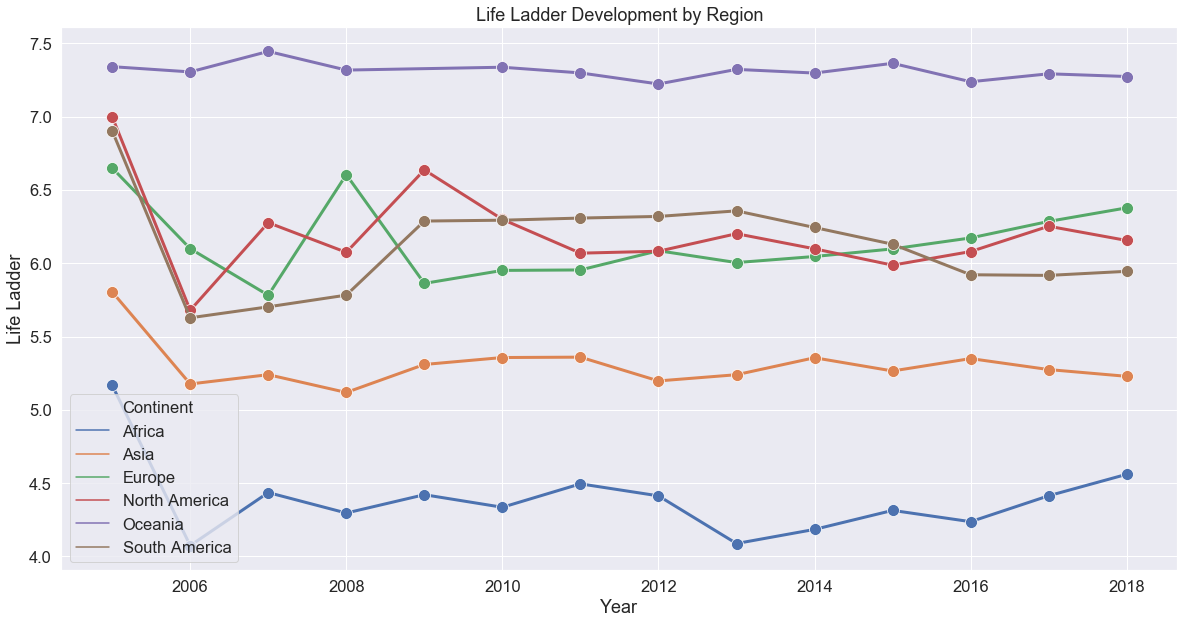

In [127]:
sns.set(
    font_scale=1.5,
    rc={'figure.figsize':(20,10)}
)

ax = sns.lineplot(
    x='Year', 
    y='Life Ladder', 
    hue='Continent',
    marker="o",  
    markersize=12,
    lw=3,
    data=grouped_by_year_and_continent
)

ax.set_title('Life Ladder Development by Region')

In [130]:
grouped_by_country_and_continent = data.groupby(['Continent','Country name'])['Life Ladder'].mean().reset_index()
grouped_by_country_and_continent.sample(5)

,Continent,Country name,Life Ladder
57,Asia,Cyprus,6.087859
91,Asia,Turkmenistan,5.614522
97,Europe,Austria,7.249100
87,Asia,Taiwan Province of China,6.263030
125,Europe,Poland,5.865575


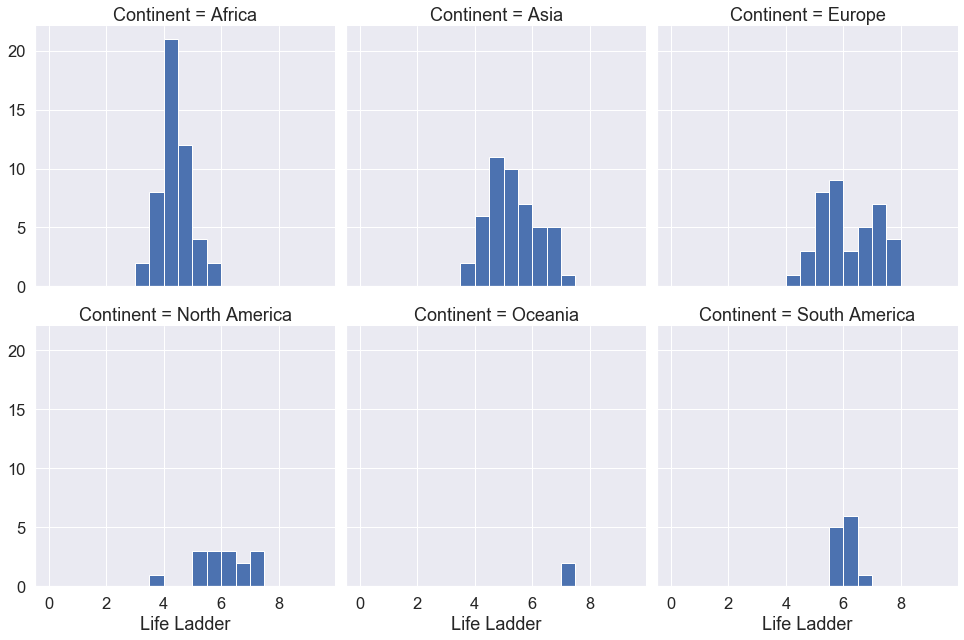

In [135]:
g = sns.FacetGrid(grouped_by_country_and_continent, col='Continent', col_wrap=3, height=4.5)
g = g.map(plt.hist, "Life Ladder",bins=np.arange(0,10,0.5))